## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.



2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


In [3]:
df0_125.head()


,x1,x2,group
0,0.781279,0.851498,a
1,1.042835,0.931282,a
2,1.144129,0.882494,a
3,0.968445,0.896508,a
4,1.122665,1.013608,a


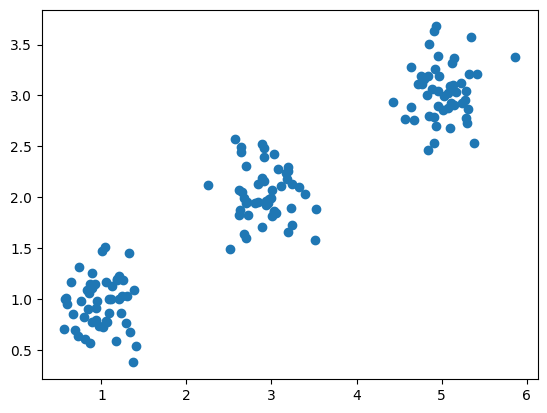

In [4]:
plt.scatter(df0_25["x1"],df0_25["x2"])


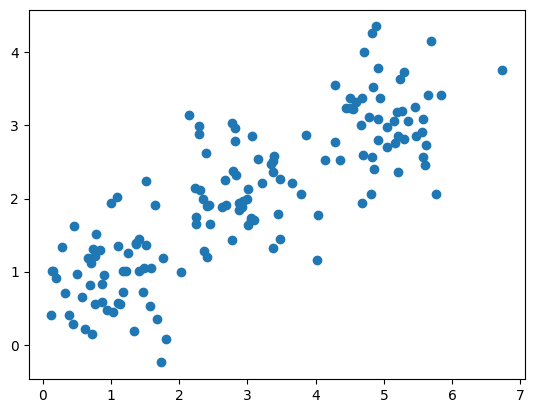

In [5]:
plt.scatter(df0_5["x1"],df0_5["x2"])


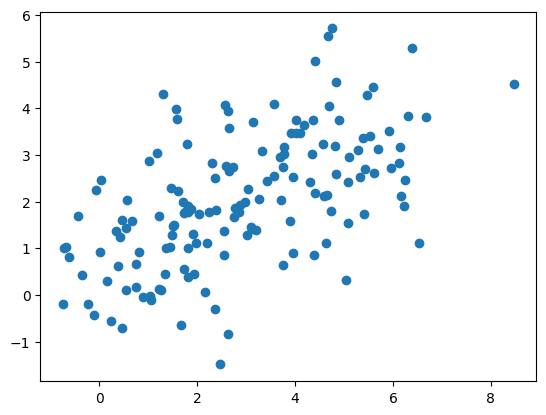

In [6]:
plt.scatter(df1_0["x1"],df1_0["x2"])


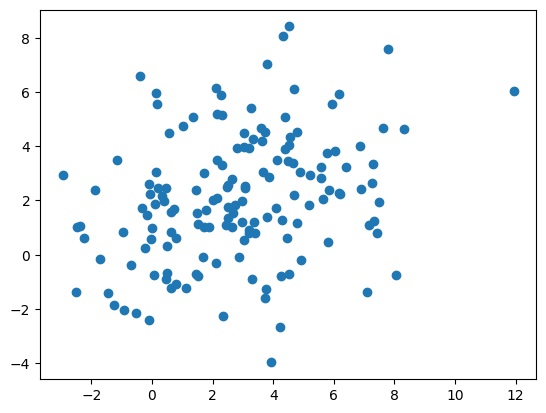

In [7]:
plt.scatter(df2_0["x1"],df2_0["x2"])

### Answer #2
## As the noise increases, the variability of the data increases and it makes it harder to distinguish clusters from one another.

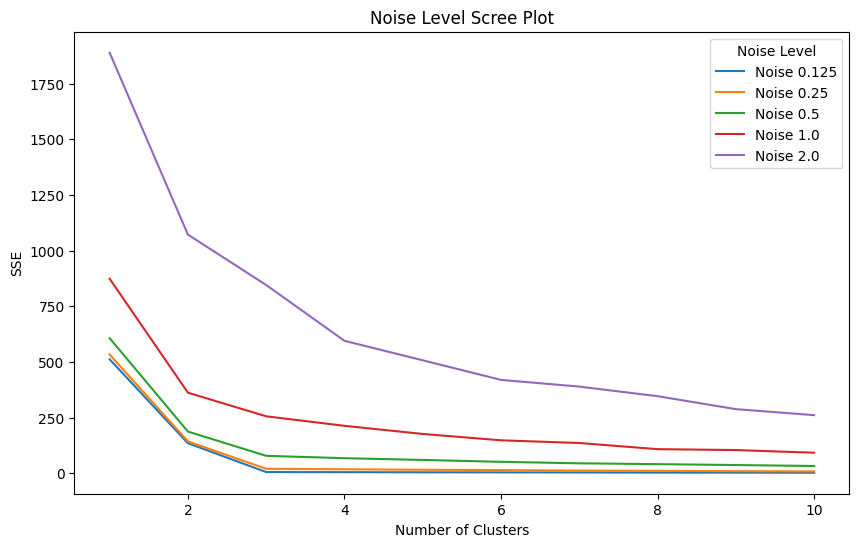

In [8]:
# 3 Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree 
# plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. 
# (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
from sklearn.cluster import KMeans

def compute_sse(data, k_max): #here im creating a function that will compute the sse for each of the k values
    sse = []
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

datasets = {
    '0.125': df0_125[['x1', 'x2']],
    '0.25': df0_25[['x1', 'x2']],
    '0.5': df0_5[['x1', 'x2']],
    '1.0': df1_0[['x1', 'x2']],
    '2.0': df2_0[['x1', 'x2']]
}

k_max = 10 #here im setting the max number of cluseers to ten

plt.figure(figsize=(10, 6))
for noise_level, data in datasets.items(): 
    sse = compute_sse(data, k_max)
    sns.lineplot(x=np.arange(1, k_max + 1), y=sse, label=f'Noise {noise_level}')

plt.title('Noise Level Scree Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend(title='Noise Level')
plt.show()


In [9]:
"""the greater the noise, the harder it is to distinguish the elbow in the scree plot, the the more
likely it ts that the optimal number of clusters will be overestimated."""""

'the greater the noise, the harder it is to distinguish the elbow in the scree plot, the the more\nlikely it ts that the optimal number of clusters will be overestimated.'

In [10]:
#4. Explain the intuition of the elbow, using this numerical simulation as an example.

"""We can tell the optimal number of clusters by looking at where adding more clusters isn't as 
significantly decreasing the sum of squared error. In my scree plot, the i have multiple dataset with different 
noise plotted with the number of clusters plotted against the sum of squared error. We see as the noise 
increases, the number of clusters where the elbow point exists is larger """

"We can tell the optimal number of clusters by looking at where adding more clusters isn't as \nsignificantly decreasing the sum of squared error. In my scree plot, the i have multiple dataset with different \nnoise plotted with the number of clusters plotted against the sum of squared error. We see as the noise \nincreases, the number of clusters where the elbow point exists is larger "

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [13]:
#1

data = '/Users/iank/UVADS/Machine-Learning1/hw/clustering/mywork/data/data/2022 election cycle fundraising.csv'
df = pd.read_csv(data)
df.head()
df[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].replace({'\$': '', ',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

df.head()
#print(df["Member"].unique().tolist())




<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/var/folders/gb/vgxhll1j4szbj3cjjhc9pkj00000gn/T/ipykernel_933/2298404537.py:6: SyntaxWarning: invalid escape sequence '\$'
  df[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].replace({'\$': '', ',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')


,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


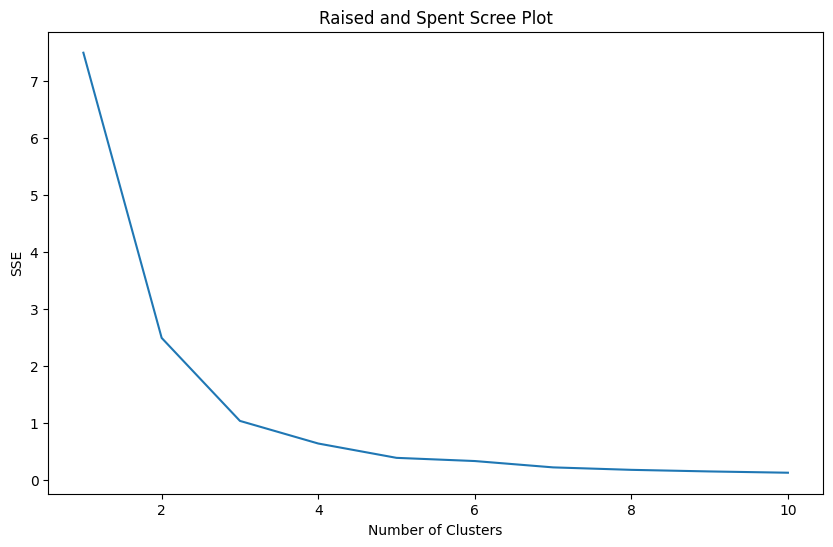

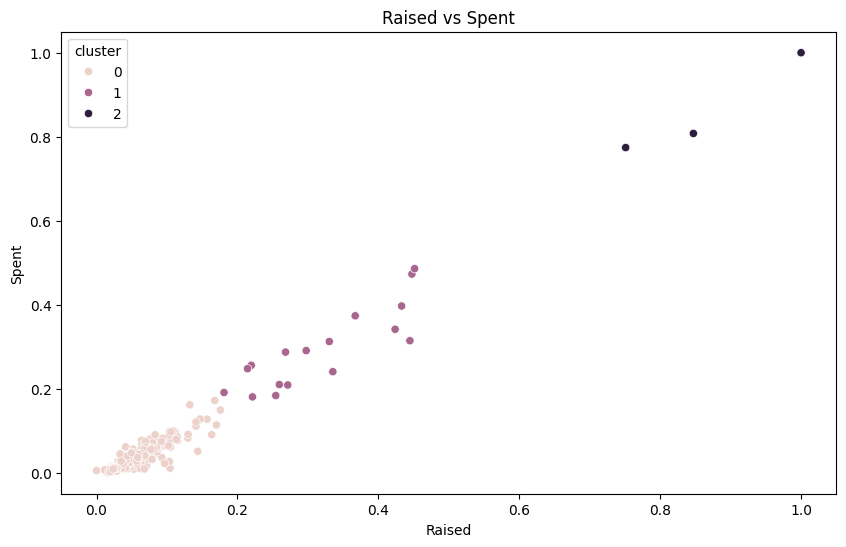

In [14]:
#2 Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means 
# clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What 
# do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

from sklearn.preprocessing import MinMaxScaler #here im importing the minmaxscaler

scaler = MinMaxScaler() 
df[['Raised', 'Spent']] = scaler.fit_transform(df[['Raised', 'Spent']]) #here im normalizing the raised and spent columns
df.head()

sse = compute_sse(df[['Raised', 'Spent']], k_max) #here im computing the sse for the rised and spent columns

plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, k_max + 1), y=sse) #
plt.title('Raised and Spent Scree Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

#optimal number of the clusetrs is 3 since that is where the elbow appears to be

kmeans = KMeans(n_clusters=3, random_state=100) #here im setting the number of clusters to 3
df['cluster'] = kmeans.fit_predict(df[['Raised', 'Spent']]) #here im fitting the model and predicting the clusters
df.head()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='cluster')
plt.title('Raised vs Spent')
plt.show()

# The smallest two clusters are are from the politicians in cluseers 1 and 2


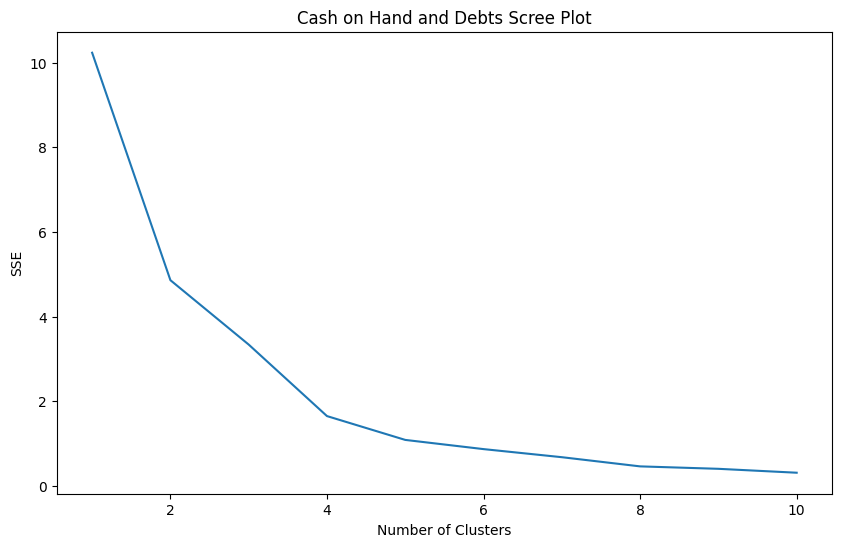

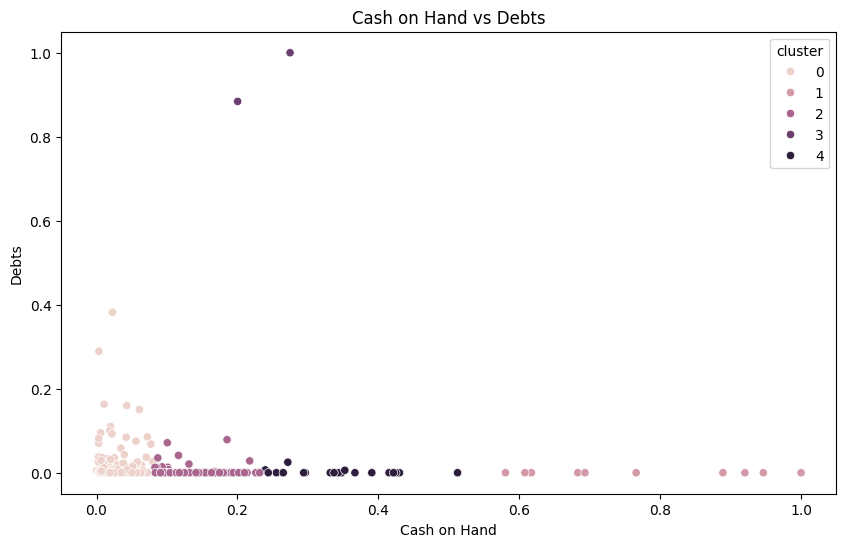

In [17]:
#3 Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

df[['Cash on Hand', 'Debts']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']]) #here im normalizing the cash on hand and debts columns
df.head()

sse = compute_sse(df[['Cash on Hand', 'Debts']], k_max) #here im computing the sse for the cash on hand and debts columns

plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, k_max + 1), y=sse)
plt.title('Cash on Hand and Debts Scree Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

#optimal number of the clusters is 5 since that is where the elbow appears to be

kmeans = KMeans(n_clusters=5, random_state=100) #here im setting the number of clusters to 5
df['cluster'] = kmeans.fit_predict(df[['Cash on Hand', 'Debts']]) #here im fitting the model and predicting the clusters
df.head()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='cluster')
plt.title('Cash on Hand vs Debts')
plt.show()






**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?